<a href="https://colab.research.google.com/github/mchhour31/NN_work/blob/main/ep2_intro_cnn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [18]:
import tensorflow as tf
from tensorflow import keras

In [19]:
# import the data
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [20]:
train_images.shape

(60000, 28, 28)

In [21]:
test_images.shape

(10000, 28, 28)

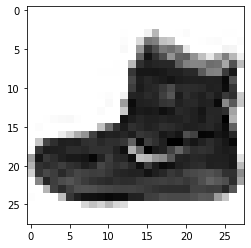

In [22]:
import matplotlib.pyplot as plt
import matplotlib

plt.imshow(train_images[0], cmap=matplotlib.cm.binary)

In [23]:
# feature scaling
train_images = train_images / 255.0
test_images = test_images / 255.0

In [51]:
model = tf.keras.Sequential([
     # generate 64 filters, and multiply each of them across the image
     # at each epoch, it will figure out which filters give the best signals to help match the images to their labels
    tf.keras.layers.Conv2D(64, (3,3), input_shape=(28, 28, 1), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2), # compress the image, and enhance the features

    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2), # compress the image, and enhance the features
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [52]:
model.fit(train_images, train_labels)

1875/1875 [==============================] - 110s 58ms/step - loss: 0.4374 - accuracy: 0.8406


In [53]:
test_loss, test_acc = model.evaluate(test_images, test_labels)

313/313 [==============================] - 5s 16ms/step - loss: 0.3380 - accuracy: 0.8787


In [57]:
model.predict(test_images)[0]

313/313 [==============================] - 5s 16ms/step


array([1.0103537e-06, 1.7294067e-07, 5.1653836e-07, 2.3917271e-06,
       6.4364940e-06, 1.8898174e-03, 2.3600489e-06, 1.7354911e-02,
       1.6839044e-04, 9.8057401e-01], dtype=float32)

In [59]:
import numpy as np

np.argmax(model.predict(test_images)[0])

313/313 [==============================] - 9s 28ms/step


9

Text(0.5, 0, '9')

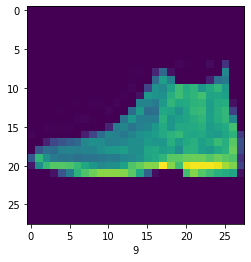

In [60]:
plt.imshow(test_images[0])
plt.xlabel(test_labels[0])